In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.pyplot import imread
from scipy.ndimage.filters import gaussian_filter
import matplotlib.cm as cm
from matplotlib.colors import Normalize


In [4]:
path0 = '/Users/Charlotte/Desktop/ANLY502/pubg-match-deaths/deaths/kill_match_stats_final_0.csv'
path1 = '/Users/Charlotte/Desktop/ANLY502/pubg-match-deaths/deaths/kill_match_stats_final_1.csv'
path2 = '/Users/Charlotte/Desktop/ANLY502/pubg-match-deaths/deaths/kill_match_stats_final_2.csv'
path3 = '/Users/Charlotte/Desktop/ANLY502/pubg-match-deaths/deaths/kill_match_stats_final_3.csv'
path4 = '/Users/Charlotte/Desktop/ANLY502/pubg-match-deaths/deaths/kill_match_stats_final_4.csv'

In [5]:
kill0 = pd.read_csv(path0, header=0)
kill1 = pd.read_csv(path1, header=0)
kill2 = pd.read_csv(path2, header=0)
kill3 = pd.read_csv(path3, header=0)
kill4 = pd.read_csv(path4, header=0)


In [6]:
kill = pd.concat([kill0,kill1,kill2,kill3,kill4],ignore_index=True)

kill = kill.drop('killer_name',axis=1)
kill = kill.drop('match_id',axis=1)
kill = kill.drop('victim_name',axis=1)

kill.head(10)

,killed_by,killer_placement,killer_position_x,killer_position_y,map,time,victim_placement,victim_position_x,victim_position_y
0,Grenade,5.0,657725.10,146275.2,MIRAMAR,823,5.0,657725.10,146275.2
1,SCAR-L,31.0,93091.37,722236.4,MIRAMAR,194,33.0,92238.68,723375.1
2,S686,43.0,366921.40,421623.9,MIRAMAR,103,46.0,367304.50,421216.1
3,Down and Out,9.0,472014.20,313274.8,MIRAMAR,1018,13.0,476645.90,316758.4
4,M416,9.0,473357.80,318340.5,MIRAMAR,1018,13.0,473588.50,318418.8
5,Punch,26.0,721944.40,359575.3,MIRAMAR,123,47.0,0.00,0.0
6,AKM,12.0,376333.80,317858.9,MIRAMAR,886,15.0,372808.30,297124.2
7,S686,27.0,373125.30,433540.6,MIRAMAR,137,38.0,373125.80,433608.8
8,S686,40.0,370990.60,424074.5,MIRAMAR,89,47.0,370761.10,423662.1
9,AKM,25.0,368799.30,420810.2,MIRAMAR,117,43.0,368015.00,421322.6


In [9]:
edf = kill.loc[kill['map'] == 'ERANGEL']
def killer_victim(kill_0):
    #choose the position data 
    df = edf
    victim_x = df.filter(regex = 'victim_position_x')
    victim_y = df.filter(regex = 'victim_position_y')
    killer_x = df.filter(regex = 'killer_position_x')
    killer_y = df.filter(regex = 'killer_position_y')
    #ravel()the matrix
    victim_x = pd.Series(victim_x.values.ravel('F'))
    victim_y = pd.Series(victim_y.values.ravel('F'))
    killer_x = pd.Series(killer_x.values.ravel('F'))
    killer_y = pd.Series(killer_y.values.ravel('F'))
    vic = {'x':victim_x, 'y':victim_y}
    kil = {'x':killer_x, 'y':killer_y}
    
    victim = pd.DataFrame(data = vic).dropna(how = 'any')
    victim = victim[victim['x'] > 0]
    killer = pd.DataFrame(data = kil).dropna(how = 'any')
    killer = killer[killer['x'] > 0]
    return killer, victim

In [10]:
erana,eranb = killer_victim(edf)

print(erana.head(10))
print(eranb.head(10))
print(len(erana), len(eranb))
# transcribe location data to image size
plot_a = erana[['x','y']].values * 4040 /800000
plot_b = eranb[['x','y']].values * 4040 /800000
print(plot_a)
print(plot_b)

           x         y
0   496989.8  312569.7
1   496989.8  312569.7
2   460416.7  414748.8
3   488034.1  347220.3
4   501062.9  425078.6
5   495501.2  429826.2
6   466173.1  642295.2
7   512029.6  450259.2
9   446553.8  621515.8
10  503140.7  433313.3
          x         y
0  497385.4  331528.2
1  497819.4  331981.3
2  459817.9  414426.3
3  487444.2  347651.0
4  493043.4  434458.1
5  495755.7  438322.0
6  466214.9  641051.5
7  509867.3  437920.8
8  475198.1  426731.2
9  446698.3  621034.1
49107821 50579899
[[2509.79849  1578.476985]
 [2509.79849  1578.476985]
 [2325.104335 2094.48144 ]
 ...
 [1945.4923    586.011595]
 [ 803.121195 1397.24814 ]
 [1552.85985  2238.716005]]
[[2511.79627  1674.21741 ]
 [2513.98797  1676.505565]
 [2322.080395 2092.852815]
 ...
 [1930.06455   578.91382 ]
 [ 804.87001  1388.141475]
 [1592.572545 2274.23417 ]]


In [13]:
def heatmap(x, y, s, bins = 100):
    heatmap, xedges, yedges = np.histogram2d(x, y, bins = bins)
    heatmap = gaussian_filter(heatmap, sigma = s)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    return heatmap.T, extent

In [14]:
bg = imread('/Users/Charlotte/Desktop/ANLY502/pubg-match-deaths/erangel.jpg')
#bg = imread('erangel.jpg')
hmap, extent = heatmap(plot_a[:,0], plot_a[:,1], 1.5, bins =800)
alphas = np.clip(Normalize(0, hmap.max()/100, clip=True)(hmap)*1.5,0.0,1.)
colors = Normalize(hmap.max()/100, hmap.max()/20, clip=True)(hmap)
colors = cm.bwr(colors)
colors[..., -1] = alphas

hmap2, extent2 = heatmap(plot_b[:,0],plot_b[:,1],1.5, bins = 800)
alphas2 = np.clip(Normalize(0, hmap2.max()/100, clip = True)(hmap2)*1.5, 0.0, 1.)
colors2 = Normalize(hmap2.max()/100, hmap2.max()/20, clip=True)(hmap2)
colors2 = cm.RdBu(colors2)
colors2[...,-1] = alphas2

Text(0.5, 1.0, 'Deathrate in Erangel')

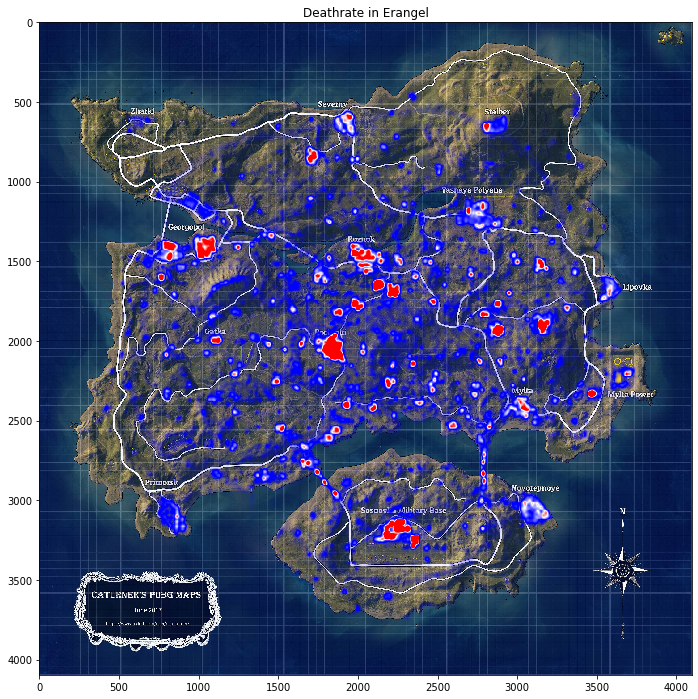

In [15]:
#erangel Deathrate
fig, ax = plt.subplots(figsize = (12,12))
ax.set_xlim(0, 4096);ax.set_ylim(0, 4096)
ax.imshow(bg)
ax.imshow(colors, extent = extent, origin = 'lower', cmap = cm.bwr, alpha = 1)
plt.gca().invert_yaxis()
plt.title('Deathrate in Erangel')

Text(0.5, 1.0, 'Killrate in Erangel')

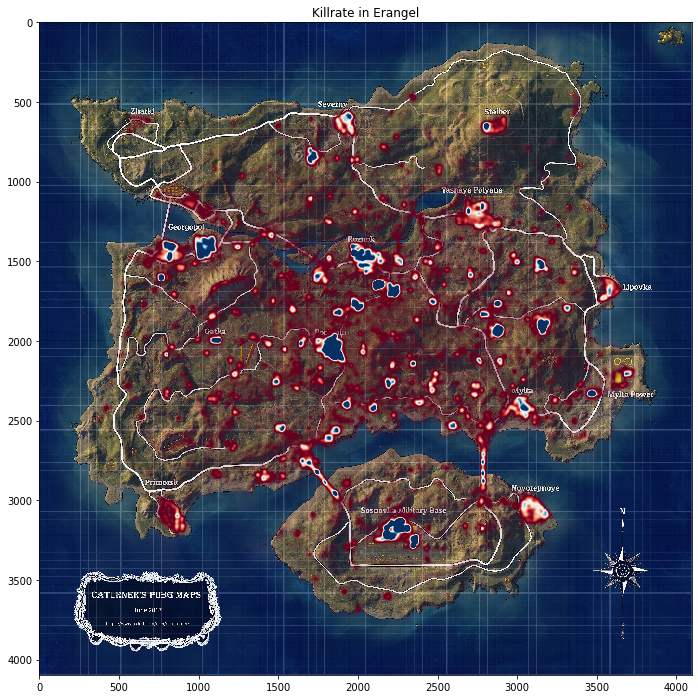

In [16]:
#Erangel Killrate
fig, ax = plt.subplots(figsize = (12,12))
ax.set_xlim(0, 4096); ax.set_ylim(0, 4096)
ax.imshow(bg)
ax.imshow(colors2, extent = extent2, origin = 'lower', cmap = cm.RdBu, alpha = 1)
plt.gca().invert_yaxis()
#plt.colorbar()
plt.title('Killrate in Erangel')

In [17]:
def divbutnotbyzero(a, b):
    c = np.zeros(a.shape)
    for i, row in enumerate(b):
        for j, el in enumerate(row):
            if el == 0:
                c[i][j] = 0
            else: # got the kill/death ratio
                c[i][j] = a[i][j]/el
    return c

hmap, extent = heatmap(plot_a[:,0], plot_a[:,1], 0, bins = 800)
hmap2, extent2 = heatmap(plot_b[:,0], plot_b[:,1], 0, bins = 800)
hmap3 = divbutnotbyzero(hmap, hmap2)
alphas = np.clip(Normalize(0, hmap3.max()/100, clip=True)(hmap)*1.5, 0.0,1.)
colors = Normalize(hmap3.max()/100, hmap3.max()/20, clip=True)(hmap)
colors = cm.rainbow(colors)
colors[...,-1] = alphas

Text(0.5, 1.0, 'Kill/Death ratio in Erangel')

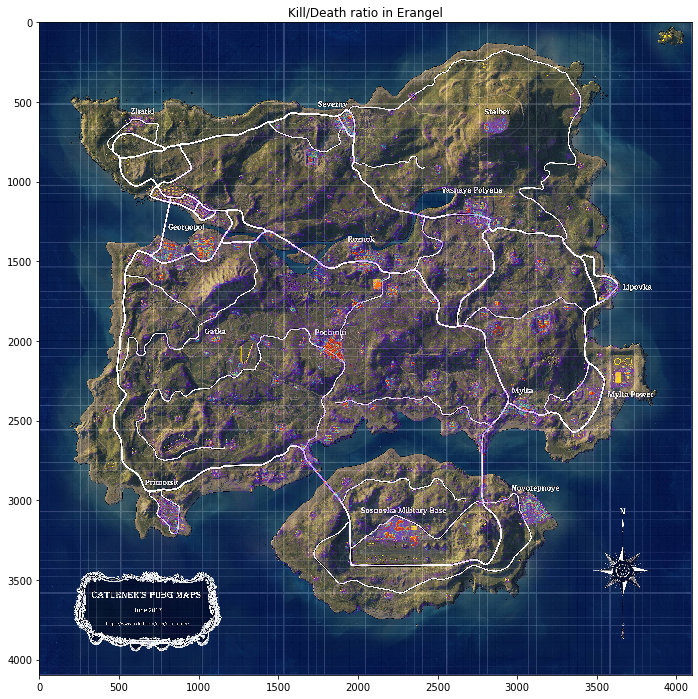

In [18]:
fig, ax = plt.subplots(figsize = (12, 12))
ax.set_xlim(0,4096); ax.set_ylim(0, 4096)
ax.imshow(bg)
ax.imshow(colors, extent = extent, origin = 'lower', cmap = cm.rainbow, alpha = 0.5)
plt.gca().invert_yaxis()
plt.title('Kill/Death ratio in Erangel')